In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import warnings

#ignorar os avisos do python
warnings.filterwarnings('ignore')

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

In [2]:
# Importação dos dados
df = pd.read_csv(r'./dados/A155957189_28_143_208.csv', encoding= 'ISO-8859-1', sep=';', error_bad_lines=False, skiprows=3, skipfooter=12, thousands='.',decimal=',', engine = 'python')

# Limpeza do Dataset
## Remoção das colunas que possuem valores faltantes ou distorcidos


In [3]:
# Retirando os valores faltantes do dataset original

# Buscando somente as colunas que não possuem dados faltantes e salvando no dataframe usaveis
usaveis = df.mean().index.tolist()

# Criando a nova coluna de estados
usaveis.insert(0, 'Unidade da Federação')
usaveis = df[usaveis]

# Separando por região


In [4]:
# https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python

# Separando o número da ciadade da coluna "Unidade da Federação" pelo caraceter de espaço entre o número e o estado.
a = df['Unidade da Federação'].str.split(' ', 1, expand = True)
#df.insert(value = a[0], column = 'Número do Estado', loc = 0)
# Guardando o número separado
c = a[0]

# Substituindo pelo estado sem o número antes do nome
usaveis['Unidade da Federação'] = a[1]


# Criando uma coluna com o primeiro caracter de cada uma das linhas da coluna 'Número do Estado'
a = c.str[:1]

# Criando o dicionário com chave e valor, onde os valores atuais serão substituidos pelas Regiões 
dict_regiao = {'1':'Norte','2':'Nordeste','3':'Sudeste','4':'Centro Oeste','5':'Sul'}
regiao = a.replace(dict_regiao,regex=True)

usaveis.insert(value = regiao, column = 'Região', loc = 1)

# Utilizando a coluna de estados como Index
usaveis = usaveis.set_index('Unidade da Federação')

usaveis.head(10)

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,328876965.09
Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4705309002.29
Amapá,Norte,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,...,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40,309860092.59
Tocantins,Norte,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,...,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84,1020028272.64
Maranhão,Nordeste,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,...,33991348.70,32711259.43,31985709.32,34430463.50,32446802.41,30927070.93,26797697.76,23260245.95,17294509.11,3871069498.04
Piauí,Nordeste,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,...,25817440.95,22452255.50,20636997.20,20326808.24,20021998.76,19352220.14,18437275.64,13636005.36,9542151.53,2280888802.74


In [5]:
# Buscando os index que serão utilizados para o dataset limpo
usaveis.index

Index(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá', 'Tocantins',
       'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba',
       'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Mato Grosso do Sul',
       'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype='object', name='Unidade da Federação')

# Top 5 estados que mais gastaram com saúde mais o estado do Espírito Santo

In [6]:
# Criando o dataframe com os top 5 estados filtrado pela coluna Total
usaveis_new = usaveis.sort_values('Total', ascending=False)[:5]

# Adicionando o estado do Espírito Santo
usaveis_new = usaveis_new.append(usaveis.loc[['Espírito Santo']])

# Removendo os 6 primeiros meses, pois os dados antes de 2008 não são tão confiáveis e também o mês de janeiro de 2008, pois aparentemente, os dados que não foram apresentados anteriormente foram somados neste mês
usaveis_new = usaveis_new[usaveis_new.columns[7:]]

# Removendo a coluna total do novo dataframe para não distorcer o plot do gráfico
usaveis_new = usaveis_new.drop(columns = 'Total')
usaveis_new.head(10)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,...,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,...,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,...,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,57910170.98,59592124.91,57565742.08,...,96799361.58,108536525.93,111762290.19,110107867.30,113886837.47,116738266.69,116833971.73,102317646.36,84404640.00,37798832.80
Rio de Janeiro,44128159.73,42900847.02,45306499.53,43951349.46,44111107.27,44359056.71,42500830.29,43066461.47,44553314.55,41351511.51,...,88135690.57,95941141.03,89795469.41,81886688.22,80570244.20,82807309.85,90567351.87,87201907.99,60873103.08,49149884.48
Espírito Santo,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,...,31958199.08,41931102.65,36405257.36,34491126.71,34800541.67,35708727.33,40500910.57,33767261.13,25669612.63,15606368.11


In [7]:
# Criando uma função para o Plot dos gráficos
def plot(data, titulo):
    
    # Caso o ipynb for baixado e queira rodar em algum compilador, trocar o valor para zero para ter a responsividade do plotly
    github = 1
    selecionados = data.T

    fig = px.line(
        selecionados, x =selecionados.index, y=selecionados.columns,
        labels = {'value':'Valor em Reais','index':'Período (Ano/Mês)'},
        width = 1400, height = 600)

    fig.update_layout(
        title={
            'text': titulo,
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'})
        
    if github == 1:        
        img_bytes = fig.to_image(format="png", engine = 'kaleido')
        return Image(img_bytes)
    else:
        fig.show()

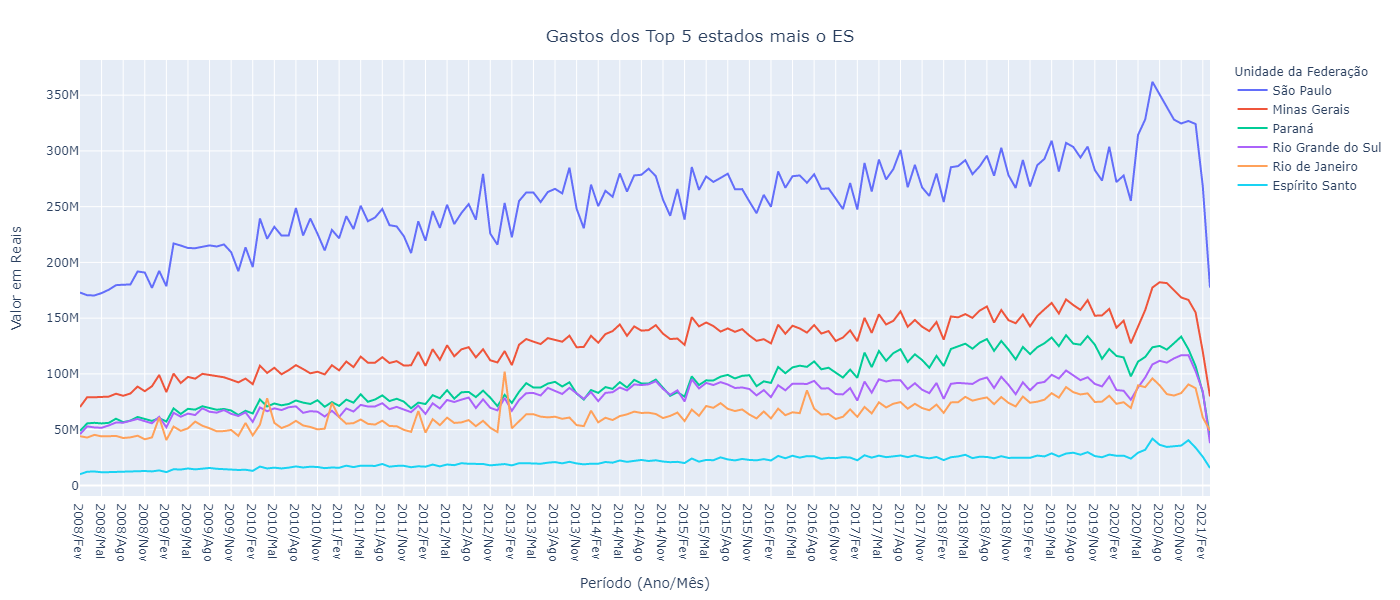

In [8]:
plot(usaveis_new,'Gastos dos Top 5 estados mais o ES')

# Plotando os gastos por estados para a Região Sudeste no ano de 2013

In [9]:
# Identificando os anos do dataframe de forma automática, buscando somente as linhas onde a coluna Região possui valor igual a Sudeste
usaveis_sudeste = usaveis_new.loc[usaveis['Região']=='Sudeste']

# Buscando somente as colunas que possuem 2013 no título
usaveis_sudeste = usaveis_sudeste.filter(regex = '2013')

usaveis_sudeste.head()

,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez
Unidade da Federação,,,,,,,,,,,,
São Paulo,253312916.64,222562451.81,255057678.54,262706559.19,262644147.73,254105335.70,263146000.69,265967608.06,261898387.61,285001066.39,248140524.27,230586191.85
Minas Gerais,120432270.50,107903261.86,126141564.88,131252895.30,128908897.64,126767664.45,132088496.92,130236231.24,128841100.31,134284948.05,123888837.02,124208668.26
Rio de Janeiro,102104204.33,51206653.61,57584874.79,63702778.97,63794891.58,61689752.64,60992531.77,61577361.16,59717201.67,60865517.30,54070879.39,53162041.15
Espírito Santo,19123320.52,17941358.17,19869295.44,19890295.23,19979773.02,19406981.92,20365841.76,20876552.66,19758345.74,21145926.80,19684239.72,18868882.32


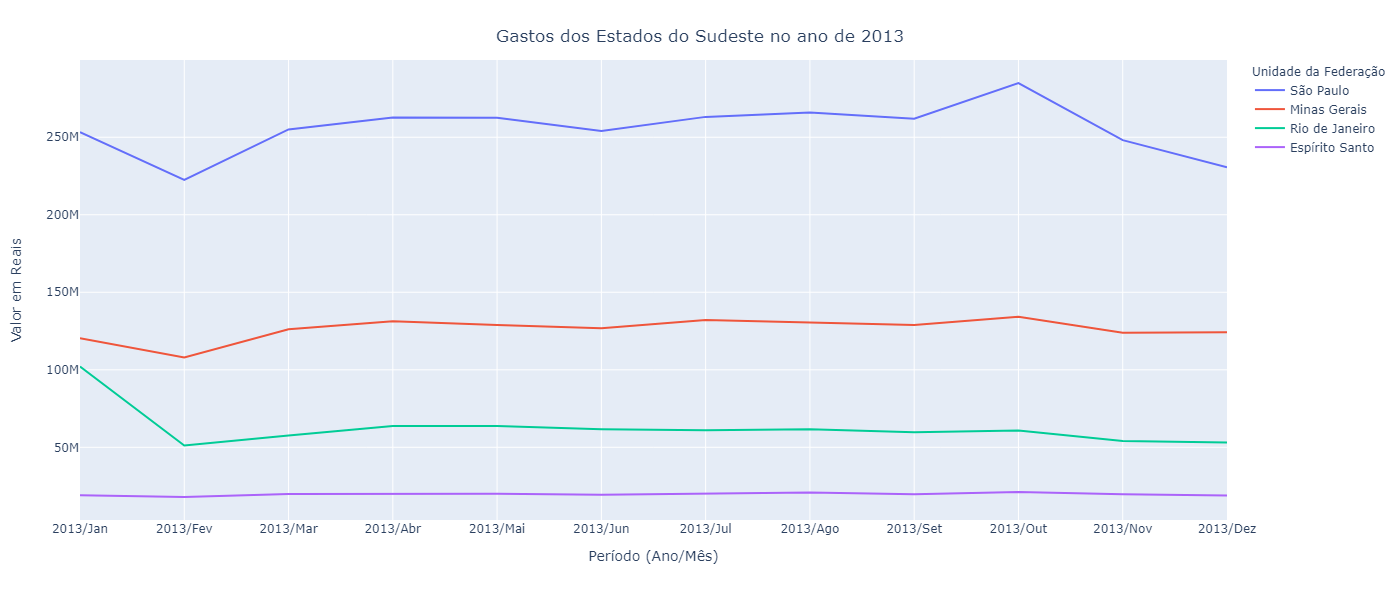

In [10]:
plot(usaveis_sudeste, 'Gastos dos Estados do Sudeste no ano de 2013')

#
Observando os gastos para janeiro no ano de 2013 não é possível afirmar que o comportamento foi equivalente para todos os estados, já que, no estado do Espírito Santo, não houve diferença significativa entre os dois primeiro meses.
#
Porém, ao analisar o comportamento dos estados ao longo de outros anos é possível notar que é comum notar picos para os meses de Janeiro, o que nos leva a crer que dependendo da política adotada pelo estado é comum que no primeiro mês o ano o investimento, ou melhor, o repasse para a saúde é maior.


# Relação entre casos de Dengue e investimentos no Estado do Rio de Janeiro
#
### Olhando exclusivamente o estado do Rio de Janeiro, podemos observar um maior investimento em Saúde para o intervalo de tempo entre 2010 e 2013, o que coincide com o maior número de casos de Degue na Cidade do Rio de Janeiro.



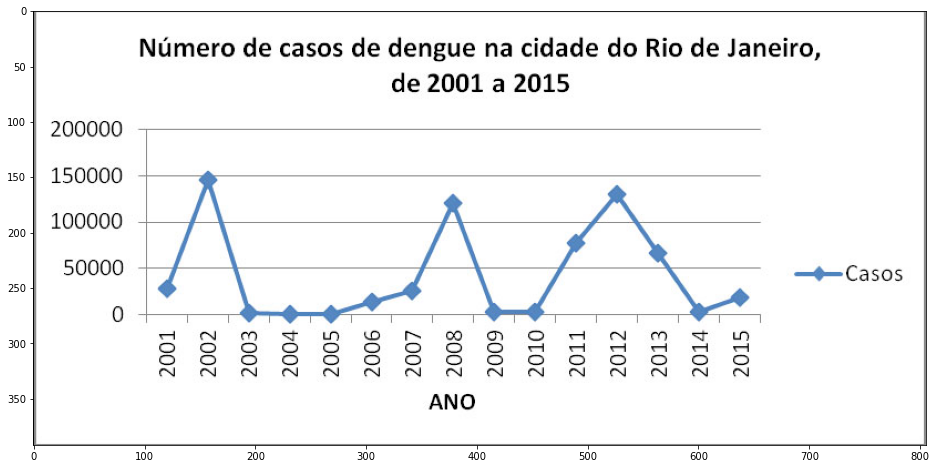

In [11]:
# create a file-like object from the url

a = plt.imread("http://observatoriodasauderj.com.br/wp-content/uploads/2016/08/Untitled-8.jpg", format = 'jpg')
fig = plt.figure(figsize= (16,9))
plt.imshow(a)
plt.show()

In [12]:
# Identificando os anos do dataframe de forma automática, buscando somente as linhas onde a coluna Região possui valor igual a Sudeste

usaveis_rjaux = usaveis.filter(regex = 'Rio de Janeiro', axis = 0) # axis = 0, para que a busca seja feita pela coluna de Index

# Filtragem do estado do Rio de Janeiro para os anos de 2010 a 2014
usaveis_rj = usaveis_rjaux.filter(regex = '2010|2011|2012|2013|2014') #obs: O operador "|" serve como "or" no regex

usaveis_rj.head()

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2014/Mar,2014/Abr,2014/Mai,2014/Jun,2014/Jul,2014/Ago,2014/Set,2014/Out,2014/Nov,2014/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
Rio de Janeiro,55993709.91,44833345.11,54473238.33,78128632.98,56028875.32,51435826.33,53873907.49,57867285.17,53736019.37,52379338.55,...,60648820.92,58610389.83,62155089.40,63706499.87,66150757.15,64974113.77,65178224.11,64033630.86,60392275.29,62318598.92


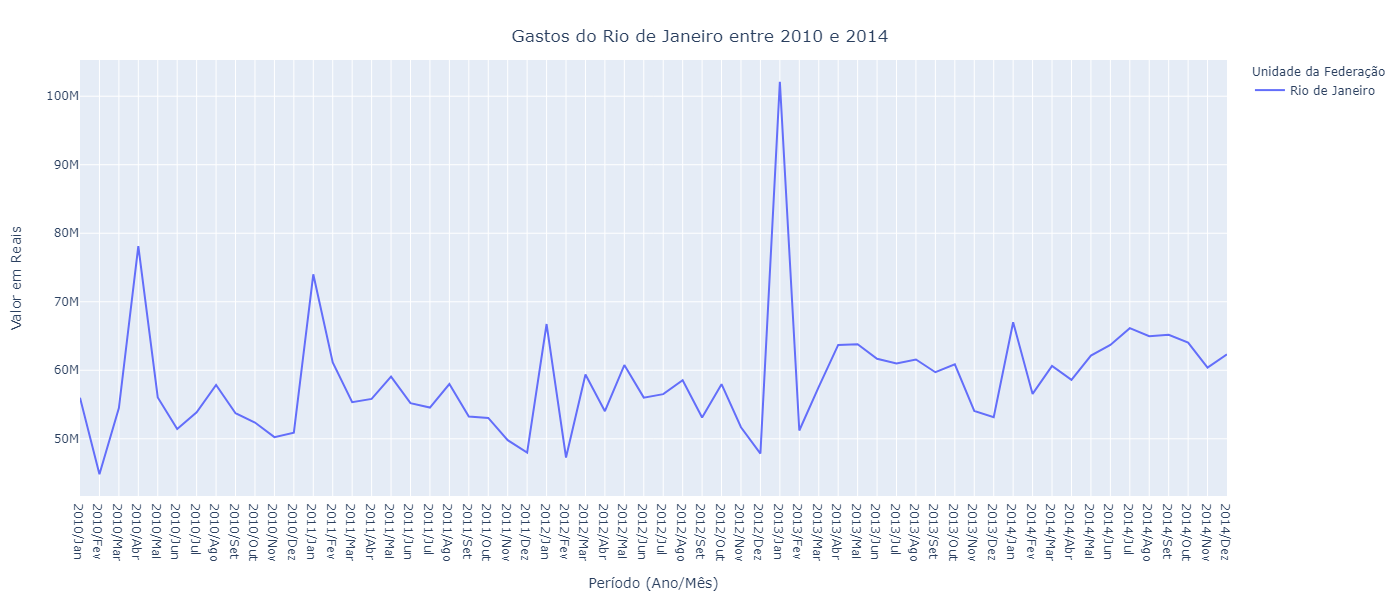

In [13]:
plot(usaveis_rj, 'Gastos do Rio de Janeiro entre 2010 e 2014')

## Observando da figura logo acima, o pior ano para a crise de Dengue foi entre 2011 e 2013, o que explica o pico de gastos para o mês de Janeiro de 2013
### Obs: Também podemos trabalhar com a possibilidade de que esse pico seja explicado por gastos que não foram corretamente lançados no mês de exercício do ano anterior e foram somados aos valores do primeiro mês do ano seguinte, pois podemos observar que no ano de 2012 que foi o pior ano não houve aumento nos investimento e logo em seguida, no primeiro mês de 2013 houve um salto muito grande nos gastos para o estado do Rio de Janeiro.